# NEUS 642 - Week 2 Homework

We'll continue working with the spike data from class. So first, let's initialize this instance of python and load the datasets, same as in the lecture notebook. Refer to the lecture notebook if you need to remind yourself about the formatting of the data.

In [65]:
import numpy as np

In [66]:
spikes1 = np.loadtxt('data/CRD016c-40-1.csv', delimiter=',')
cell1_label = 'CRD016c-40-1'
spikes2 = np.loadtxt('data/CRD016c-50-1.csv', delimiter=',')
cell2_label = 'CRD016c-50-1'

stim = np.loadtxt('data/stim.csv', delimiter=',')
stim = np.round(stim, 3)
print("Loaded spike times for two neurons and list of stimulus events")
print("spikes1 - number of spike events:", spikes1.shape)
print("spikes2 - number of spike events:", spikes2.shape)
print("stim    - number of stimuli X [freq, start, stop]", stim.shape)

Loaded spike times for two neurons and list of stimulus events
spikes1 - number of spike events: (1732,)
spikes2 - number of spike events: (9337,)
stim    - number of stimuli X [freq, start, stop] (251, 3)


# Plot a tuning curve with error bars

The frequency tuning curve we generated in class plots the mean spike rate response to each distinct stimulus, but it doesn't indicate which of those *responses are signficantly different from the spontaneous spike rate*. We want to determine which stimulus frequencies evoke a response.

**Statistics primer:** One quick way to assess significance is to measure the standard error on the mean (SEM), which is the standard deviation across a list of samples $(x)$, divided by the square root of the number of samples. Important detail for computing statistics on real data: estimating standard deviation and SEM requires a "degree of freedom" (DOF) correction, which means dividing by $n-1$ instead of $n$ (The basic intuition for this correction is that you need one DOF in your n data points to estimate the mean, $m$, so you only have $n-1$ left to compute variance/SEM):

$SEM = \frac{1}{\sqrt{n-1}} \sqrt{(\sum_i^n{(x(i)-m)^2} / (n-1))} = \frac{1}{n-1} \sqrt{(\sum_i^n{(x(i)-m)^2}}$

As a simple rule of thumb, the measurement of a mean value is signficant with $p<0.05$ if it is at least **2 SEM** from baseline. 

**Another note/warning(!!)** SEM works if your data samples are *independent and normally distributed*. Because we randomly varied the order of stimulus presentation, we can pretty safely assume the samples are independent. "Normal" means the distribution can be described by a Gaussian function. Spiking activity isn't normal, but let's assume it is today. We'll learn more about non-parametric statistics, which are better for analyzing spiking and other biological data later.

But for now, let's stick with SEM. Using `numpy`, we can compute SEM with the `np.std` function. Use the `ddof` parameter to include the degrees-of-freedom correction.

So we will do three things:

1. Compute the spontaneuous spike rate for a neuron as a measure of baseline.
2. Compute the mean and SEM response to each tone (include 1-degree of freedom correction)
3. Plot the mean response to each tone with error bars to indicate whether 2 SEM do or do not overlap with the spont rate.

A bit more about SEM calculation.

In [53]:
x = np.array([4,4,4,5,5,5,6,6,6])
n=len(x)
std = np.std(x, ddof=1)
sem = std / np.sqrt(n-1)
print("SEM for", len(x), "samples:", sem)

SEM for 9 samples: 0.30618621784789724


Note that as we collect more samples, our SEM typically gets smaller, meaning we're more confident about our measurment of the mean. Standard deviation does not get smaller.

In [54]:
x2 = np.array([4,4,4,5,5,5,6,6,6,4,5,6,4,5,6,4,5,6])
n=len(x2)
sem = np.std(x2, ddof=1)/np.sqrt(n-1)
print("SEM for", len(x2), "samples:", sem)

SEM for 18 samples: 0.2037706832433973


There are many ways to skin a cat. You can compute SEM directly without the `std` function. And/or use the alternative formulation of `np.sqrt(x)` as an exponent, `x**0.5`. 

In [55]:
m = np.mean(x2)
sem = np.sum((x2-m)**2)**0.5/(n-1)
print("Same thing:", sem)

Same thing: 0.2037706832433973


## Question 1 - Function to compute spontaneous rate.

It's considered good practice to break down, or *modularize*, analysis code into small chunks, making it easier to debug and reuse. One particular place where modularization is helpful is between code that performs computations and code that plots the results.

So let's start with something simple and bite-sized. To assess if a response is significant, we need to measure the change in spike rate relative to the spontaneous spike rate in units of spikes/sec. Let's write a function that calculates spont rate from our data. This should be easy, simply **"packaging" code from the lecture** inside a function like this:

```
spont_rate = calc_spont_rate(stim, spikes)
```

**Note** that the variable containing the spike data is called `spikes` (not `spikes1` or `spikes2`).  Why is that?  We also pass the `stim` variable to this function. Why is that imporant?

In [74]:
def calc_spont_rate(stim, spikes):
    """
    Average spike rates across the pre-stimulus window for all stimulis 
    listed in stim and return the average spont rate in units of spikes/sec.
    """
    # Your answer here
    all_start_times = stim[:,1]

    pre_duration = 0.1
    pre_start_times = all_start_times - pre_duration
    total_trials = len(pre_start_times)
    spont_single_rates = np.zeros(total_trials)
    for i,(s,e) in enumerate(zip(pre_start_times,all_start_times)):
        spont_single_rates[i] = np.sum((spikes>s) & (spikes<=e))/pre_duration
    spont_rate = np.mean(spont_single_rates)
    np.round(spont_rate,3)
    
    return spont_rate

Test it. This should produce the same answer as we got during lecture.

In [75]:
calc_spont_rate(stim, spikes1)

1.9920318725099602

And we can call the same function for the second neuron:

In [76]:
calc_spont_rate(stim, spikes2)

15.458167330677291

## Question 2 - Function to compute mean and SEM response for each tone

Next step: write a function that takes our `spikes` and `stim` arrays, and returns three arrays: a list of unique stimulus frequencies, the mean response to each frequency and the SEM for each frequency. Again, you should be able to **borrow a most of the code from the lecture notebook**.

Syntax:
```
f, m, sem = tuning_mean_sem(stim, spikes)

```

In [80]:
m='dog'

def tuning_mean_sem(stim, spikes):
    """
    Determine the list of unique stimulus frequencies and then compute 
    the mean and SEM spike rate for each frequencies (as in class, computed 
    across the time period from stimulus onset to offset).
    """
    # Your answer here
    print(m)
    f_list=np.unique(stim[:,0])
    stim_duration = np.mean(stim[:,2]-stim[:,1])
    minside = np.zeros(f_list.shape)
    sem = np.zeros(f_list.shape)
    for j, f in enumerate(f_list):   # for loop to iterate through each unqiue
        b = (stim[:,0]==f)
        start_times = stim[b,1]
        stop_times = stim[b,2]
        n=len(start_times)
        trial_count = len(start_times)
        single_trial_rates = np.zeros(trial_count)
        for i, (s,e) in enumerate(zip(start_times,stop_times)):
            # calculate mean spike rate on each trial
            single_trial_rates[i] = np.sum((spikes>s) & (spikes<=e)) / stim_duration
    
        minside[j] = np.mean(single_trial_rates)
        sem[j] = np.std(single_trial_rates, ddof=1)/np.sqrt(n-1)
        #sem[j] = np.std(single_trial_rates)/np.sqrt(n)

    return f_list, m, sem

Test it with data from the first unit (`spikes1`):

In [81]:
f, m, sem = tuning_mean_sem(stim, spikes1)

i = 6
print(f"For {f[i]} Hz stimulus, mean response is {m[i]:.3f} spikes/sec, and SEM is {sem[i]:.3f} spikes/sec")

dog
For 1231.0 Hz stimulus, mean response is 11.667 spikes/sec, and SEM is 2.331 spikes/sec


In [63]:
# find the response to the stimulus closest to 1000 Hz
flookup = 1000
fmatch = np.argmin(np.abs(f-flookup))
print(f"For {f[fmatch]} Hz stimulus, mean response is {m[fmatch]:.3f} spikes/sec, and SEM is {sem[fmatch]:.3f} spikes/sec")

For 933.0 Hz stimulus, mean response is 35.789 spikes/sec, and SEM is 2.340 spikes/sec


## Question 3 - Make a pretty plot with error bars

Finally: using the results generated by your two functions, write a function that generates a **tuning curve (SHOULD LOOK JUST LIKE THE TUNING CURVE FROM LECTURE)** with error bars to indicate stimuli that produce a significant response. The error bars in your plot should indicate **2 SEMs**. Points where the error bars do not cross the spont line are signficant responses.

The function `plt.errorbar` should come in handy. Important syntax detail: `errorbar` requires three inputs. `errorbar(x,y,e)`, where x indicates values on the x axis, in this case, frequency.

Don't forget to label your x and y axes with accurate and interpretable units. And use `cell_label` to give your plot a title. Syntax:
```
plot_mean_sem(f, m, sem, cell_label)
```

In [64]:
import matplotlib.pyplot as plt

def plot_mean_sem(f, m, sem, cell_label):
    # Your answer here

SyntaxError: incomplete input (3843522567.py, line 4)

Test your code:

In [ ]:
spont = calc_spont_rate(stim, spikes1)
f, m, sem = tuning_mean_sem(stim, spikes1)

plot_mean_sem(f, m, sem, cell1_label)

Now let's enjoy the satisfaction of nice modular code that can be applied to data from a second neuron:

In [ ]:
spont = calc_spont_rate(stim, spikes2)
f, m, sem = tuning_mean_sem(stim, spikes2)

plot_mean_sem(f, m, sem, cell2_label)

# Bonus question

Look pretty! But interesting, are the error bars convincing? Remember the point about assuming a normal distribution from above. Any thoughts on why/how the error bars may not be accurate? Don't worry if you don't have ideas. This is a subtle but important aspect of data analysis that will come up again.

In [ ]:
# Your thoughts here.

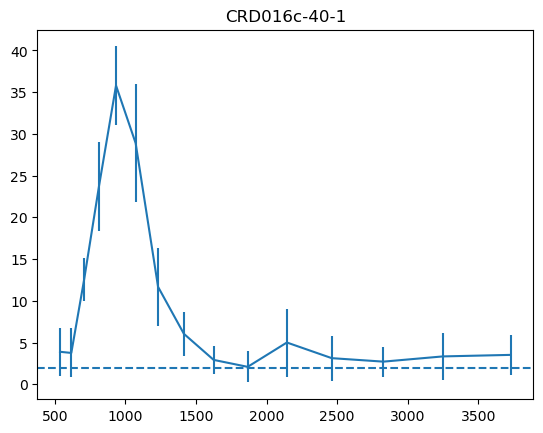

In [59]:
def calc_spont_rate(stim, spikes):
    """
    Average spike rates across the pre-stimulus window for all stimulis 
    listed in stim and return the average spont rate in units of spikes/sec.
    """
    all_start_times = stim[:,1]
    pre_duration = 0.1
    pre_start_times = all_start_times - pre_duration
    total_trials = len(all_start_times)
    
    spont_single_rates = np.zeros(total_trials)
    for i,(s,e) in enumerate(zip(pre_start_times,all_start_times)):
        spont_single_rates[i] = np.sum((spikes>s) & (spikes<=e))/pre_duration
    spont_rate = np.mean(spont_single_rates)

    return spont_rate
    
def tuning_mean_sem(stim, spikes):
    """
    Determine the list of unique stimulus frequencies and then compute 
    the mean and SEM spike rate for each frequencies (as in class, computed 
    across the time period from stimulus onset to offset).
    """
    f_list=np.unique(stim[:,0])
    stim_duration = np.mean(stim[:,2]-stim[:,1])
    m = np.zeros(f_list.shape)
    sem = np.zeros(f_list.shape)
    for j, f in enumerate(f_list):   # for loop to iterate through each unqiue
        b = (stim[:,0]==f)
        start_times = stim[b,1]
        stop_times = stim[b,2]
        n=len(start_times)
        trial_count = len(start_times)
        single_trial_rates = np.zeros(trial_count)
        for i, (s,e) in enumerate(zip(start_times,stop_times)):
            # calculate mean spike rate on each trial
            single_trial_rates[i] = np.sum((spikes>s) & (spikes<=e)) / stim_duration
    
        m[j] = np.mean(single_trial_rates)
        sem[j] = np.std(single_trial_rates, ddof=1)/np.sqrt(n-1)
        #sem[j] = np.std(single_trial_rates)/np.sqrt(n)
    
    return f_list, m, sem

import matplotlib.pyplot as plt
def plot_mean_sem(f,m,sem, cell_label):
    plt.errorbar(f,m,sem*2)
    plt.axhline(spont,ls='--')
    plt.title(cell_label)
    
spont = calc_spont_rate(stim, spikes1)
f, m, sem = tuning_mean_sem(stim, spikes1)

plot_mean_sem(f, m, sem, cell1_label)



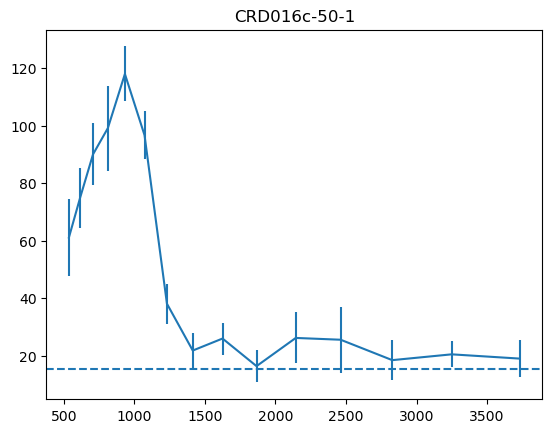

In [37]:
spont = calc_spont_rate(stim, spikes2)
f, m, sem = tuning_mean_sem(stim, spikes2)

plot_mean_sem(f,m,sem, cell2_label)

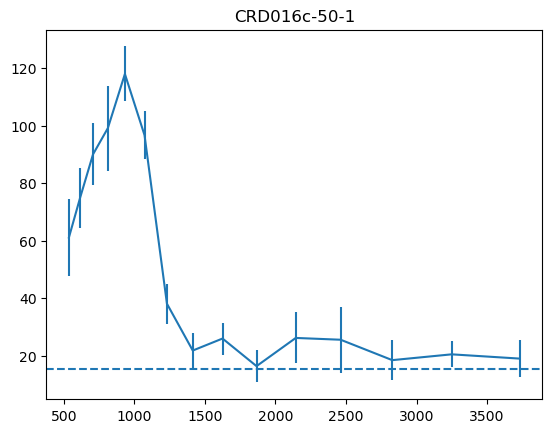

In [38]:
spont = calc_spont_rate(stim, spikes2)
f, m, sem = tuning_mean_sem(stim, spikes2)

plot_mean_sem(f,m,sem, cell2_label)